# TASK 1

October 5th, 2020: Write a Python function called sqrt2 that calculates and
prints to the screen the square root of 2 to 100 decimal places. Your code should
not depend on any module from the standard library1 or otherwise. You should
research the task first and include references and a description of your algorithm.




In [1]:
def sqrt2(my_number): 
    # I researched how to do a nested function to encapsulate sqrt2 as the overarching function, outer / inner function 
    # see https://stackabuse.com/python-nested-functions/
    # my_number is 2, when the function sqrt2 is called sqrt2(2), see last line of code below


    x = my_number * 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
    # Because Python does not do 100 decimal places, we multiply 2 to a really large integer, where the square root of this number will be an integer length of 101 characters
    # e.g. 14142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727
    # is square root of 200000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
    # The above could also be coded this way x = my_number * 10 ** 200
 
    r = x

    def test_diffs(x, r): 

        # test_diffs is the inner function of sqrt2, the code which I used for this inner function was given to me by expert on stackoverflow
        # https://stackoverflow.com/questions/64278117/is-there-a-way-to-create-more-decimal-points-on-python-without-importing-a-libra/64278569?noredirect=1#comment113668731_64278569
        # on my question on stackoverflow I describe the research I have done, and how far I got with a possible solution
        
        
        d0 = abs(x - r**2)
        dm = abs(x - (r-1)**2)
        dp = abs(x - (r+1)**2)
        minimised = d0 <= dm and d0 <= dp
        below_min = dp < dm
        return minimised, below_min

    while True:
        oldr = r # this is a variable used for keeping track of original numaber
        r = (r + x // r) // 2

        minimised, below_min = test_diffs(x, r)
        if minimised:
            break

        if r == oldr:
            if below_min:
                r += 1 # increment r by 1
            else:
                r -= 1 # decrease r by 1
            minimised, _ = test_diffs(x, r)

            if minimised:
                break

    # We could present answer using print formatting from original stackoverflow answer
    # https://stackoverflow.com/questions/64278117/is-there-a-way-to-create-more-decimal-points-on-python-without-importing-a-libra/64278569?noredirect=1#comment113668731_64278569
    # print(f'{r // 10**100}.{r % 10**100:0100d}')"""

    # Or we can code to convert the final number into a string, and separate the string into two parts and add a fullstop in the middle https://stackoverflow.com/questions/1228299/changing-one-character-in-a-string
    r = str(r)
    text = r[:1] + "." + r[1:]
    print(text)


sqrt2(2) # call the function sqrt

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


# Task 2

November 2nd, 2020: The Chi-squared test for independence is a statistical
hypothesis test like a t-test. It is used to analyse whether two categorical variables
are independent. The Wikipedia article gives the table below as an example [4],
stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats
to verify this value and calculate the associated p value. You should include a short
note with references justifying your analysis in a markdown cell.
https://en.wikipedia.org/wiki/Chi-squared_test

![table.png](table.png)

### Videos Watched

https://youtu.be/fMIwIKLGke0
associated Jupyter Notebook https://nbviewer.jupyter.org/github/bhattbhavesh91/chi-squared-feature-selection-selectkbest/blob/master/chi-squared-selectkbest-notebook.ipynb

This referenced use of 

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2


https://youtu.be/WXPBoFDqNVk <br>
https://youtu.be/Pbo7VbHK9cY <br>
https://youtu.be/I10q6fjPxJ0 <br>

At layman entry point into statistics, for me it was at first a daunting task to find for dummies statistical training guides on chi-squared test, and to apply that to the scipy.stats functions available.

### Written Sources of investigation

As the task assignment specifically referenced scipy.stats I checked Stackoverflow

https://stackoverflow.com/questions/44817281/performing-chi-squared-test-in-python

from scipy.stats import chisquare  
chisquare([ <your data points>])

I also checked the user manual.
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

I raised a question on Stackoverflow hoping that with expert advice, I could both broaden my understanding of the chi square test, and to use the best available scipy.stats function to reference the table data.
    
My question can be found here:
https://stackoverflow.com/questions/64669448/understanding-scipy-stats-chisquare
    
### My Question On Stackoverflow
    
Can someone help me with scipy.stats.chisquare? I do not have a statistical / mathematical background, and I am learning scipy.stats.chisquare with this data set from https://en.wikipedia.org/wiki/Chi-squared_test

The Wikipedia article gives the table below as an example, stating the Chi-squared value based on it is approximately 24.6. I am to use scipy.stats to verify this value and calculate the associated p value.

![table.png](table.png)
    
I have found what looks like the most likely formula solutions to help me here

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

![chi_squared_solutions.png](chi_squared_solutions.png)  

As I am new to statistics, and also the use of scipy.stats.chisquare I am just not sure of the best approach, and how best to enter the data from provided table into the arrays, and whether to supply expected values? from Wikipedia.
    


### Final Solution from Stackoverflow

![table.png](table.png)


>> That data is a contingency table. SciPy has the function scipy.stats.chi2_contingency that applies the chi-square test to a contingency table. It is fundamentally just a reqular chi-square test, but when applied to a contingency table, the expected frequencies are calculated under the assumption of independence (chi2_contingency does this for you), and the degrees of freedom depends on the number of rows and columns (chi2_contingency calculates this for you, too).
>> Here's how you can apply the chi-square test to that table:
>> https://stackoverflow.com/questions/64669448/understanding-scipy-stats-chisquare/

From using the above answer, I didn't need to research further the expected frequencies for each category, because the chi2_contingency does this for you.
The chi2_contingency function also calulates the degrees of freedom.

As requested for this task, this chi2_contingency function was able to verify the value of 24.6 (24.571) and calculate the associated p value as 0.00040984

In [2]:
import numpy as np
from scipy.stats import chi2_contingency


# We use a multi dimensional data array from numpy to represent the table

table = np.array([[90, 60, 104, 95], # White collar
                  [30, 50,  51, 20], # Blue collar
                  [30, 40,  45, 35]]) # No collar

# the variables chi2, p, dof, expected

chi2, p, dof, expected = chi2_contingency(table) #chi2_contingency function from scipy.stats is applied to the table
    # the variables chi2, p, dof, expected - are the same as set out in the user guide url below                                              
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

"""
The .g used in the print formating stands for General format. 
General format: For a given precision p >= 1, this rounds the number to p significant digits and 
then formats the result in either fixed-point format or in scientific notation, depending on its magnitude."""


chi2 statistic:     24.571
p-value:            0.00040984
degrees of freedom: 6
expected frequencies:
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


'\nThe .g used in the print formating stands for General format. \nGeneral format: For a given precision p >= 1, this rounds the number to p significant digits and \nthen formats the result in either fixed-point format or in scientific notation, depending on its magnitude.'

In [3]:
import numpy as np
from scipy.stats import chi2_contingency


table = np.array([[90, 60, 104, 95],
                  [30, 50,  51, 20],
                  [30, 40,  45, 35]])

chi2, p, dof, expected = chi2_contingency(table)

print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

chi2 statistic:     24.571
p-value:            0.00040984
degrees of freedom: 6
expected frequencies:
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


In [4]:
import numpy as np
import scipy.stats


table = np.array([[90, 60, 104, 95],
                  [30, 50,  51, 20],
                  [30, 40,  45, 35]])

chi2, p, dof, expected = scipy.stats.chi2_contingency(table)

print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

chi2 statistic:     24.571
p-value:            0.00040984
degrees of freedom: 6
expected frequencies:
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


# Task 3

November 16th, 2020: The standard deviation of an array of numbers x is
calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)) .
However, Microsoft Excel has two different versions of the standard deviation
calculation, STDEV.P and STDEV.S . The STDEV.P function performs the above
calculation but in the STDEV.S calculation the division is by len(x)-1 rather
than len(x) . Research these Excel functions, writing a note in a Markdown cell
about the difference between them. Then use numpy to perform a simulation
demonstrating that the STDEV.S calculation is a better estimate for the standard
deviation of a population when performed on a sample. Note that part of this task
is to figure out the terminology in the previous sentence.

SAMPLE
=STDEV.S(600,470,170,430,300)


POPULATION
np.std()
147.32277488562318



### STANDARD DEVIATION PERFORMED ON A POPULATION

## STDEV.P USED IN EXCEL
![STDEVP.png](STDEVP.png)
=STDEV.P(600,470,170,430,300)<br>
=STDEV.P(A3,B3,C3,D3,E3)<br>

RESULT<br>
147.3227749

## How To Do Standard Deviation In NumPy (equivalent to excel STDEV.P)

In [5]:
import numpy as np
a = np.array([600,470,170,430,300])
np.std(a)

147.32277488562318

### STANDARD DEVIATION PERFORMED ON A SAMPLE

## STDEV.S USED IN EXCEL
![STDEVS.png](STDEVS.png)
=STDEV.S(600,470,170,430,300)<br>
=STDEV.S(A3,B3,C3,D3,E3)

RESULT<br>
164.7118696

## STDEV USED IN EXCEL
![STDEV.png](STDEV.png)
=STDEV(600,470,170,430,300)<br>
=STDEV(A3,B3,C3,D3,E3)

RESULT<br>
164.7118696

## How To Do Standard Deviation In NumPy (equivalent to excel STDEV.S)

In [6]:
import numpy as np
s = [600,470,170,430,300]

np.std(s, ddof=1)


164.7118696390761

#https://numpy.org/doc/stable/reference/generated/numpy.std.html
Computing the standard deviation in float64 is more accurate:

>>>
np.std(a, dtype=np.float64)
0.44999999925494177 # may vary

In [7]:
import numpy as np
s = [600,470,170,430,300]

np.std(s, ddof=1, dtype=np.float64)

164.7118696390761

## What is Standard Deviation?

Excel functions and NumPy functions for Standard Deviation have their routes in mathematical theory.
The Standard Deviation is a measure of how spread out numbers are.

## How to calculate it 


Standard Deviation
The Standard Deviation is a measure of how spread out numbers are.

Its symbol is σ (the greek letter sigma)

The formula is easy: it is the square root of the Variance. So now you ask, "What is the Variance?"

Variance
The Variance is defined as:

The average of the squared differences from the Mean.

To calculate the variance follow these steps:

Work out the Mean (the simple average of the numbers)
Then for each number: subtract the Mean and square the result (the squared difference).
Then work out the average of those squared differences. (Why Square?)
Example
You and your friends have just measured the heights of your dogs (in millimeters):
dogs on graph shoulder heights

The heights (at the shoulders) are: 600mm, 470mm, 170mm, 430mm and 300mm.

Find out the Mean, the Variance, and the Standard Deviation.

Your first step is to find the Mean:

Answer:
Mean	=	 600 + 470 + 170 + 430 + 3005 
 	=	 19705 
 	=	394
so the mean (average) height is 394 mm. Let's plot this on the chart:

dogs on graph: mean

Now we calculate each dog's difference from the Mean:

dogs on graph: deviation

To calculate the Variance, take each difference, square it, and then average the result:

Variance
σ2	=	 2062 + 762 + (−224)2 + 362 + (−94)25 
 	=	 42436 + 5776 + 50176 + 1296 + 88365 
 	=	 1085205 
 	=	21704
So the Variance is 21,704

And the Standard Deviation is just the square root of Variance, so:

Standard Deviation
σ	=	√21704
 	=	147.32...
 	=	147 (to the nearest mm)
 

And the good thing about the Standard Deviation is that it is useful. Now we can show which heights are within one Standard Deviation (147mm) of the Mean:
dogs on graph: standard deviation

So, using the Standard Deviation we have a "standard" way of knowing what is normal, and what is extra large or extra small.

Rottweilers are tall dogs. And Dachshunds are a bit short, right?

Using
normal distrubution 1 sd = 68%
We can expect about 68% of values to be within plus-or-minus 1 standard deviation.

Read Standard Normal Distribution to learn more.

Also try the Standard Deviation Calculator.

But ... there is a small change with Sample Data
Our example has been for a Population (the 5 dogs are the only dogs we are interested in).

But if the data is a Sample (a selection taken from a bigger Population), then the calculation changes!

When you have "N" data values that are:

The Population: divide by N when calculating Variance (like we did)
A Sample: divide by N-1 when calculating Variance
All other calculations stay the same, including how we calculated the mean.

Example: if our 5 dogs are just a sample of a bigger population of dogs, we divide by 4 instead of 5 like this:

Sample Variance = 108,520 / 4 = 27,130
Sample Standard Deviation = √27,130 = 165 (to the nearest mm)
Think of it as a "correction" when your data is only a sample.








When you have "N" data values that are:

The Population: divide by N when calculating Variance (like we did)
A Sample: divide by N-1 when calculating Variance


## Entire Population Data Or Sample Data?

The clue to how to use STDEV. P or STDEV is in the suffix. 


**STDEV. P** If your data represents the entire population, then compute the standard deviation using STDEV. P

**STDEV. S** assumes that its arguments are a sample of the population.






The STDEV. S function calculates the standard deviation in a sample set of data. Standard deviation is a measure of how much variance there is in a set of numbers compared to the average (mean) of the numbers. The STDEV. S function is meant to estimate standard deviation in a sample.

#https://stackoverflow.com/questions/34133939/is-there-any-difference-between-numpy-std-and-excel-stdev-function

There's a difference: Excel's STDEV calculates the sample standard deviation, while NumPy's std calculates the population standard deviation by default (it is behaving like Excel's STDEVP).

To make NumPy's std function behave like Excel's STDEV, pass in the value ddof=1:


In [8]:
import numpy as np
s = [20,90,60]

a = np.std(s, ddof=1)

print(a)



The Excel STDEV function returns the standard deviation for data that represents a sample. To calculate the standard deviation for an entire population, use STDEVP or STDEV. P.
https://exceljet.net/excel-functions/excel-stdev-function

SyntaxError: invalid syntax (<ipython-input-8-eb475b8b18c8>, line 10)

# Task 4
## Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set.

4. November 30th, 2020: Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set. You will easily obtain a copy of the data set online. Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species of iris.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [9]:
# Numerical arrays
import numpy as np

# Machine Learning - KMeans
import sklearn.cluster as skcl

# Plotting
import matplotlib.pyplot as plt



In [10]:
# Data Set
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])

In [16]:
xvals = X[:,0] # COLON MEANS GET EVERYTHING, 0 MEANS GET FIRST VALUE
yvals = X[:,1] # 1 GET THE SECOND VALUE
xvals, yvals

(array([ 1,  1,  1, 10, 10, 10]), array([2, 4, 0, 2, 4, 0]))

In [12]:
# Perform kmeans fitting
kmeans = skcl.KMeans(n_clusters=2, random_state=0).fit(X)

In [13]:
# See the labels of the points
kmeans.labels_

array([1, 1, 1, 0, 0, 0])

In [33]:
# Predict the cluster for two points
newvals = np.array([[0, 0], [12, 3]])
predictions = kmeans.predict(newvals)
predictions

array([1, 0])

In [15]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

(-2.0, 6.0)

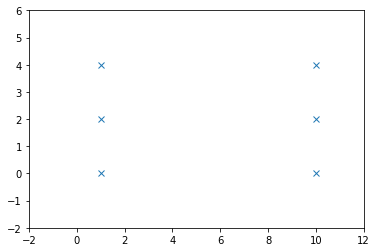

In [21]:
# Plot the data set
plt.plot(X[:,0],X[:,1],'x')
# set reasonable limits
plt.xlim([-2,12])
plt.ylim([-2,6])

(-2.0, 6.0)

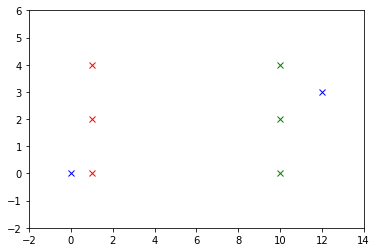

In [28]:
# Plot the data set
plt.plot(X[kmeans.labels_ == 0][:,0],X[kmeans.labels_ == 0][:,1],'gx')
plt.plot(X[kmeans.labels_ == 1][:,0],X[kmeans.labels_ == 1][:,1],'rx')
plt.plot(newvals[:,0],newvals[:,1],'bx')

# set reasonable limits
plt.xlim([-2,14])
plt.ylim([-2,6])

(-2.0, 6.0)

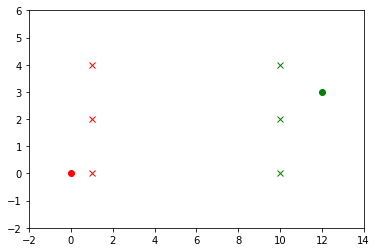

In [34]:
# Plot the data set
plt.plot(X[kmeans.labels_ == 0][:,0],X[kmeans.labels_ == 0][:,1],'gx')
plt.plot(X[kmeans.labels_ == 1][:,0],X[kmeans.labels_ == 1][:,1],'rx')
plt.plot(newvals[predictions == 0][:,0], newvals[predictions == 0][:,1],'go')
plt.plot(newvals[predictions == 1][:,0], newvals[predictions == 1][:,1],'ro')
         
         
# set reasonable limits
plt.xlim([-2,14])
plt.ylim([-2,6])